# Lab 02. 지수 평활법을 활용한 이상치 탐지 실습
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

- 시계열 데이터를 생성하고 데이터 프레임을 생성한다. 그리고 내용물을 확인한다.

In [2]:
# 시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = [10, 12 ,11, 15,9,13,8,14,10,16] + [10] * 90 # 이상치 포함된 데이터 


# 데이터 프레임 생성 
data = pd.DataFrame({
    'Date' : dates,
    'value' : values
})

print(data)

         Date  value
0  2023-01-01     10
1  2023-01-02     12
2  2023-01-03     11
3  2023-01-04     15
4  2023-01-05      9
..        ...    ...
95 2023-04-06     10
96 2023-04-07     10
97 2023-04-08     10
98 2023-04-09     10
99 2023-04-10     10

[100 rows x 2 columns]


- 지수 평활법 모델을 학습하고 추세와 추세에서의 편차를 계산한다. 

In [3]:
model = ExponentialSmoothing(data['value'], trend='add')
model_fit = model.fit()

In [4]:
# 추세 계산 
trend = model_fit.predict(start=0, end=len(data['value']) - 1)

# 추세에서의 편차 계산 
deviation = data['value'] - trend

- 지수 평활법을 이용하여 이상치를 탐지하고 시각화를 해본다.

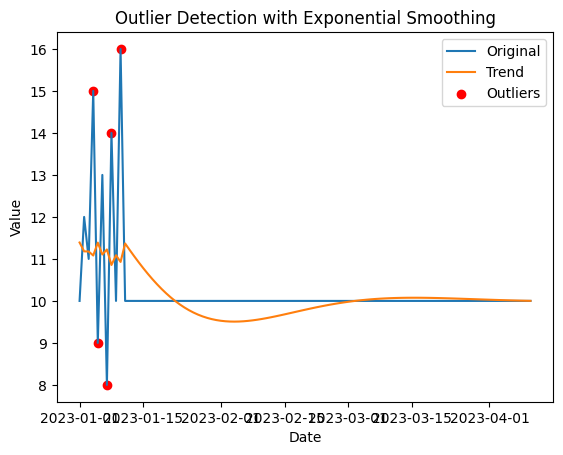

In [5]:
# 이상치 탐지 
threshold = 2 
outliers = abs(deviation) > threshold

# 시계열 데이터 시각화
plt.plot(data['Date'], data['value'], label='Original')
plt.plot(data['Date'], trend, label='Trend')
plt.scatter(data[outliers]['Date'], data[outliers]['value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Exponential Smoothing')
plt.legend()

plt.show()